In [1]:
import mdapy as mp
import freud
import numpy as np
from time import time
import matplotlib.pyplot as plt
from mdapy.plot.pltset import pltset, cm2inch
from mdapy.tools.timer import timer

[Taichi] version 1.2.0, llvm 10.0.0, commit f189fd79, win, python 3.8.15


In [2]:
mp.init('cpu')

[Taichi] Starting on arch=x64


In [34]:
@timer
def test_neighbor_average_time(ave_num=3, kind='cpu', check=False):
    assert kind in ['cpu', 'gpu']
    time_list = []
    print('*'*30)
    for num in [5, 10, 15, 20, 25, 30, 50, 70, 100, 150, 200, 250]:  
        n_repeats = (num, 100, 100)
        freud_t, mdapy_t = 0., 0.
        for turn in range(ave_num):
            print(f'Running {turn} turn in freud...')
            start = time()
            uc = freud.data.UnitCell.fcc()
            box, points = uc.generate_system(n_repeats, scale=3.615)
            end = time()
            freud_t += (end-start)
            
            print(f'Running {turn} turn in mdapy...')
            start = time()
            FCC = mp.LatticeMaker(3.615, 'FCC', *n_repeats)
            FCC.compute()
            end = time()
            mdapy_t += (end-start)
            if check:
                print(f'Checking results of {turn} turn...')
                shift_pos = points + box.L/2
                assert (np.allclose(np.min(shift_pos, axis=0), np.min(FCC.pos, axis=0)) & np.allclose(np.max(shift_pos, axis=0), np.max(FCC.pos, axis=0)))
        time_list.append([np.product(n_repeats)*4, freud_t/ave_num, mdapy_t/ave_num])
        print('*'*30)
    time_list = np.array(time_list)
    if kind == 'cpu':
        np.savetxt('time_list_cpu_build_lattice.txt', time_list, delimiter=' ', header='N freud mdapy')
    elif kind == 'gpu':
        np.savetxt('time_list_gpu_build_lattice.txt', time_list, delimiter=' ', header='N freud mdapy')
    return time_list

In [38]:
def plot(time_list, kind = 'cpu', save_fig=True):

    assert kind in ['cpu', 'gpu', 'cpu-gpu']
    if kind in ['cpu', 'gpu']:
        assert time_list.shape[1] == 3
    else:
        assert time_list.shape[1] == 4
    pltset()
    colorlist = [i['color'] for i in list(plt.rcParams['axes.prop_cycle'])]
    fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
    plt.subplots_adjust(left=0.16, bottom=0.165, top=0.95, right=0.95)
    N_max = time_list[-1, 0]
    exp_max = int(np.log10(N_max))
    x, y = time_list[:, 0]/10**exp_max, time_list[:, 1]
    
    popt = np.polyfit(x, y, 1)
    plt.plot(x, np.poly1d(popt)(x), c=colorlist[0])
    plt.plot(x, y, 'o', label = f'ovito, k={popt[0]:.1f}')

    if kind == 'cpu-gpu':
        y1 = time_list[:, 2]
        popt = np.polyfit(x, y1, 1)
        plt.plot(x, np.poly1d(popt)(x), c=colorlist[1])
        plt.plot(x, y1, 'o', label = f'mdapy-cpu, k={popt[0]:.1f}')
        
        y2 = time_list[:, 3]
        popt = np.polyfit(x, y2, 1)
        plt.plot(x, np.poly1d(popt)(x), c=colorlist[2])
        plt.plot(x, y2, 'o', label = f'mdapy-gpu, k={popt[0]:.1f}')
    else:
        y1 = time_list[:, 2]
        popt = np.polyfit(x, y1, 1)
        plt.plot(x, np.poly1d(popt)(x), c=colorlist[1])
        plt.plot(x, y1, 'o', label = f'mdapy-cpu, k={popt[0]:.1f}')

    plt.legend()
    plt.xlabel('Number of atoms ($\mathregular{10^%d}$)' % exp_max)
    plt.ylabel('Time (s)')
    if save_fig:
        plt.savefig('build_lattice_mdapy_freud.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

In [37]:
time_list_cpu = test_neighbor_average_time(ave_num=1, kind='cpu', check=False)

******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running 0 turn in mdapy...
******************************
Running 0 turn in freud...
Running

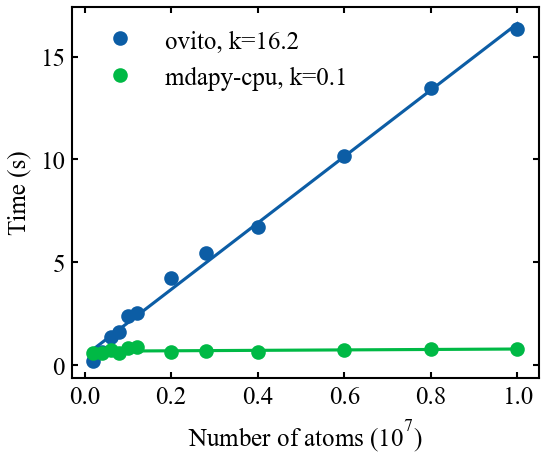

In [40]:
plot(time_list_cpu, kind = 'cpu', save_fig=False)